### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR, LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/USA_Housing.csv")
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [3]:
# Model
svr_rbf = SVR(kernel = "rbf", C = 100, gamma = 0.1, epsilon = 0.1)

# Independent variables
X = df.drop(["Price", "Address"], axis = 1)

# Dependent variable
y = df["Price"]

def scalator(X, y, column, scale_y = True):
    # Feature scaling
    # Scaling instances
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    # Scaling the variables
    x_ = np.array(X[column]).reshape(-1, 1)
    y_ = np.array(y).reshape(-1, 1)

    x_ = sc_X.fit_transform(x_)
    if scale_y == True:
        y_ = sc_y.fit_transform(y_)

    return [x_, y_]

In [4]:
def scalator(X, y, columns, scale_y = True):
    # Feature scaling
    # Scaling instances
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    # Scaling the variables
    if len(columns) < 2:
        x_ = np.array(X[columns]).reshape(-1, 1)
    else:
        x_ = X[columns]

    y_ = np.array(y).reshape(-1, 1)

    x_ = sc_X.fit_transform(x_)
    if scale_y == True:
        y_ = sc_y.fit_transform(y_)

    return [x_, y_]

In [6]:
for column in X.columns:
    x_, y_ = scalator(X, y, [column])

    model = svr_rbf.fit(x_, y_)
    score = model.score(x_, y_)

    print(f"Score using the indenpendent. variable {column} : {score}")

Score using the indenpendent. variable Avg. Area Income : 0.4096634204319102
Score using the indenpendent. variable Avg. Area House Age : 0.20620108733061626
Score using the indenpendent. variable Avg. Area Number of Rooms : 0.1136374364672671
Score using the indenpendent. variable Avg. Area Number of Bedrooms : 0.03399763843071635
Score using the indenpendent. variable Area Population : 0.16699977726268067


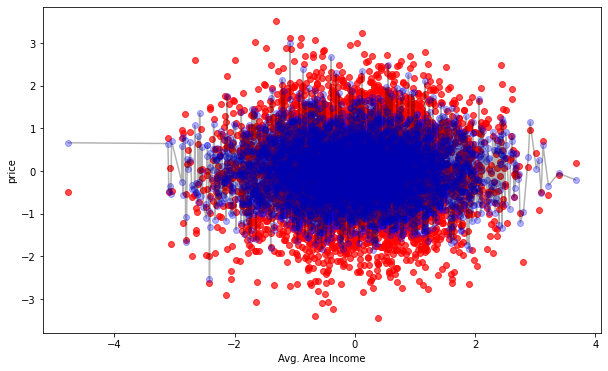

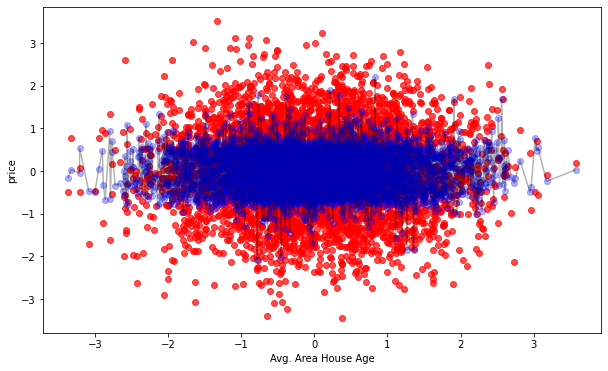

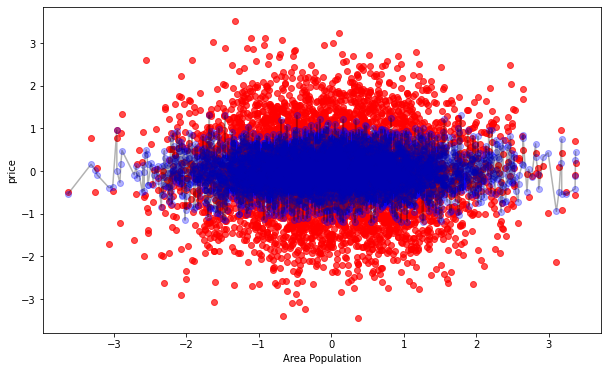

In [7]:
for column in X.columns:
    x_, y_ = scalator(X, y, [column])
    model = svr_rbf.fit(x_, y_)

    y_prediction = model.predict(x_)

    sorted_x = sorted(x_)
    #sorted_y = y_
    #sorted_y_prediction = sorted(y_prediction)
    #sorted_x = x_

    plt.figure(figsize = (10, 6))

    plt.scatter(sorted_x, y_, color = 'red', alpha = .7)
    plt.scatter(sorted_x, y_prediction, color = 'blue', alpha = .3)
    plt.plot(sorted_x, y_prediction, color = 'black', alpha = .3)

    plt.xlabel(column)
    plt.ylabel("price")

    plt.show()

Después de hacer la estandarización pertinente, podemos ver que "Avg. Area Income" es la variable independiente con mayor poder explicativo

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

In [8]:
df2 = df
df2.head(2)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...

### 1) Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

In [9]:
df2["Avg. Area Number of Rooms"] = df2["Avg. Area Number of Rooms"].apply(round)
df2.head(3)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                          7   
1      79248.642455             6.002900                          7   
2      61287.067179             5.865890                          9   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...

### 2) Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels).

In [10]:
# Independent variables
X2 = df2.drop(["Avg. Area Number of Rooms", "Address"], axis = 1)

# Dependent variable
y2 = df2["Avg. Area Number of Rooms"]

for column in X2.columns:
    plt.figure()
    plt.scatter(X2[column], y2)
    plt.title(f"{y2.name} vs {column}")
    plt.xlabel(column)
    plt.ylabel(y2.name)
    plt.show()

### 3) Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

In [11]:
# Parameters for the model
seed = 1
C = 100

In [12]:
# Model
svc = LinearSVC(C = C, random_state = seed)

# Training
for column in X2.columns:
    #x_ = np.array(X2[column]).reshape(-1, 1)
    x_2, y_2 = scalator(X2, y2, [column], scale_y = False)
    
    svc.fit(x_2, y_2)
    score = svc.score(x_2, y_2)

    print(f"Model using independent variable: {column}")
    print(f"Score: {score}")
    print("-" * 50)

Model using independent variable: Avg. Area Income
Score: 0.366
--------------------------------------------------
Model using independent variable: Avg. Area House Age
Score: 0.3782
--------------------------------------------------
Model using independent variable: Avg. Area Number of Bedrooms
Score: 0.4236
--------------------------------------------------
Model using independent variable: Area Population
Score: 0.3754
--------------------------------------------------
Model using independent variable: Price
Score: 0.3782
--------------------------------------------------


Vemos que "Avg. Area Number of Bedrooms" y "Avg. Area House Age" son las columnas que mayor capacidad explicativa sobre nuestra variable dependiente.

### 4) Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué?

In [13]:
# First, we just keep adding independent variables to the model in a progressive fashion, so we'll have up to 5 combinations

# Training
filter_ = []

for column in X2.columns:
    filter_.append(column)

    x_2, y_2 = scalator(X2, y2, filter_, scale_y = False)

    svc.fit(x_2, y_2)
    score = svc.score(x_2, y_2)

    print(f"Model using independent variables: {filter_}")
    print(f"Score: {score}")
    print("-" * 50)

Model using independent variables: ['Avg. Area Income']
Score: 0.366
--------------------------------------------------
Model using independent variables: ['Avg. Area Income', 'Avg. Area House Age']
Score: 0.3396
--------------------------------------------------
Model using independent variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms']
Score: 0.3728
--------------------------------------------------
Model using independent variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population']
Score: 0.3704
--------------------------------------------------
Model using independent variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
Score: 0.4482
--------------------------------------------------


Parece que añadir variables no mejora el score en todos los casos. Vamos a revisar todas las posibles combinaciones para ver cuál es la óptima.

In [15]:
# Now, we'll try all possible combinations

# To calculate all possible combinations
columns = list(X2.columns)

combinations = []
subcombination = []

count = 0

while count < len(columns):
    subcombination.append(columns[count])
    combinations.append(list(tuple(subcombination)))
    count += 1

    if count == len(columns):
        subcombination = []
        columns.pop(0)
        count = 0

In [16]:
for i in combinations: print(i)

['Avg. Area Income']
['Avg. Area Income', 'Avg. Area House Age']
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms']
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population']
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
['Avg. Area House Age']
['Avg. Area House Age', 'Avg. Area Number of Bedrooms']
['Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population']
['Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
['Avg. Area Number of Bedrooms']
['Avg. Area Number of Bedrooms', 'Area Population']
['Avg. Area Number of Bedrooms', 'Area Population', 'Price']
['Area Population']
['Area Population', 'Price']
['Price']


In [17]:
# Training with all possible combinations
model_number = 1
results = {}

for combination in combinations:
    x_2, y_2 = scalator(X2, y2, combination, scale_y = False)

    svc.fit(x_2, y_2)
    score = svc.score(x_2, y_2)

    print(f"Model {model_number}")
    print(f"Score: {score}")
    print(f"\nusing independent variables: {combination}")
    print("-" * 50)

    results[model_number] = score

    model_number += 1

Model 1
Score: 0.366

using independent variables: ['Avg. Area Income']
--------------------------------------------------
Model 2
Score: 0.3396

using independent variables: ['Avg. Area Income', 'Avg. Area House Age']
--------------------------------------------------
Model 3
Score: 0.3728

using independent variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms']
--------------------------------------------------
Model 4
Score: 0.3704

using independent variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population']
--------------------------------------------------
Model 5
Score: 0.4482

using independent variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
--------------------------------------------------
Model 6
Score: 0.3782

using independent variables: ['Avg. Area House Age']
--------------------------------------------------
Model 7
Score: 0.39

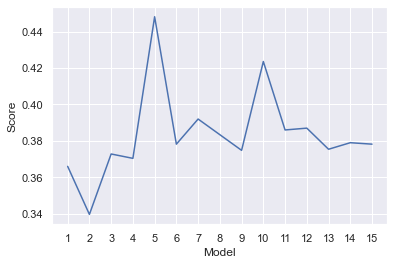

In [18]:
sns.set_theme()

ax = sns.lineplot(x = results.keys(), y = results.values())

ax.set_xticks(list(results.keys()))

plt.xlabel("Model")
plt.ylabel("Score")

plt.show()

Podemos ver que los mejores resultados se obtienen con los siguientes modelos:

- Modelo 5, con las siguientes variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
- Modelo 10, con las siguientes variables: ['Avg. Area Number of Bedrooms']

### ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target?

<AxesSubplot:>

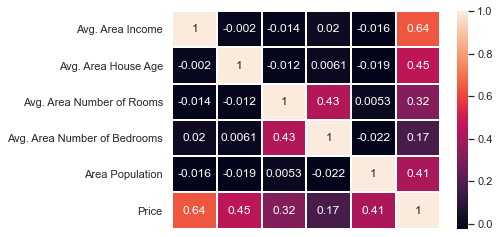

In [19]:
sns.heatmap(df2.corr(), annot = True, linewidths = .1, xticklabels = False)